In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
z='52'
snr='5'
#work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_cb16MILES_1M/'
work_dir='/export/home/extragal/zibetti/no_ownCloud/SteMaGE/data/SEDlibraries/Sandage_v4.1_Zfix_noburst_cb16MILES_1M/'
#idx_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_1M_spec_dcombnull_idx_001.fits'
par_file=work_dir+'sandage_varZ_v4.1_m'+z+'fix_noburst_1M_spec_dcombnull_001_physpar_wagef.fits'
model_file=work_dir+'sandage_varZ_v4.1_m'+z+'fix_noburst_1M.fits'
file_pert=work_dir+'sandage_varZ_v4.1_m'+z+'fix_noburst_1M_spec_dcombnull_perterr_SNR'+snr+'_001.fits'


In [3]:
#hdul_idx=fits.open(idx_file)
hdul_par=fits.open(par_file)
hdul_model=fits.open(model_file)
hdul_pert=fits.open(file_pert)


#d4000n=hdul_idx[1].data['D4000N'][...,4]
#hdhg=hdul_idx[1].data['HdHg'][...,4]
#Hb=hdul_idx[1].data['Lick_Hb'][...,4]
#mg2fe=hdul_idx[1].data['Mg2Fe'][...,4]
#mgfep=hdul_idx[1].data['MgFe_prime'][...,4]

d4000n=hdul_pert[1].data['D4000N_SIGMA200_PERT']
hdhg=hdul_pert[1].data['HDHG_SIGMA200_PERT']
Hb=hdul_pert[1].data['Lick_Hb_SIGMA200_PERT']
mg2fe=hdul_pert[1].data['Mg2Fe_SIGMA200_PERT']
mgfep=hdul_pert[1].data['MgFe_prime_SIGMA200_PERT']

#mag_u=hdul_par[1].data['ABMAG'][...,0]
#mag_g=hdul_par[1].data['ABMAG'][...,1]
#mag_r=hdul_par[1].data['ABMAG'][...,2]
#mag_i=hdul_par[1].data['ABMAG'][...,3]
#mag_z=hdul_par[1].data['ABMAG'][...,4]

mag_u=hdul_pert[1].data['ABMAG_U_PERT']
mag_g=hdul_pert[1].data['ABMAG_G_PERT']
mag_r=hdul_pert[1].data['ABMAG_R_PERT']
mag_i=hdul_pert[1].data['ABMAG_I_PERT']
mag_z=hdul_pert[1].data['ABMAG_Z_PERT']


age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

t_form=hdul_model[1].data['LOGTFORM']
tau=hdul_model[1].data['logtau']

d1090n50=np.log10((age10-age90)/age50)

In [4]:
sigma1=sigma_D4000n
sigma2=sigma_hdhg
sigma3=sigma_Hb
sigma4=sigma_mg2fe
sigma5=sigma_mgfep

sigma6=np.sqrt(sigma_u**2+sigma_r**2)
sigma7=np.sqrt(sigma_g**2+sigma_r**2)
sigma8=np.sqrt(sigma_r**2+sigma_i**2)
sigma9=np.sqrt(sigma_r**2+sigma_z**2)

In [5]:
n_chunks=50
for i_chunks in range(2, n_chunks+1):
    #_idx_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_1M_spec_dcombnull_idx_{:03d}.fits'
    _par_file=work_dir+'sandage_varZ_v4.1_m'+z+'fix_noburst_1M_spec_dcombnull_{:03d}_physpar_wagef.fits'
    _pert_file=work_dir+'sandage_varZ_v4.1_m'+z+'fix_noburst_1M_spec_dcombnull_perterr_SNR'+snr+'_{:03d}.fits'
    
    #_hdul_idx=fits.open(_idx_file.format(i_chunks))
    _hdul_par=fits.open(_par_file.format(i_chunks))
    _hdul_pert=fits.open(_pert_file.format(i_chunks))
    
    _d4000n=_hdul_pert[1].data['D4000N_SIGMA200_PERT']
    _hdhg=_hdul_pert[1].data['HDHG_SIGMA200_PERT']
    _Hb=_hdul_pert[1].data['Lick_Hb_SIGMA200_PERT']
    _mg2fe=_hdul_pert[1].data['Mg2Fe_SIGMA200_PERT']
    _mgfep=_hdul_pert[1].data['MgFe_prime_SIGMA200_PERT']

    _mag_u=_hdul_pert[1].data['ABMAG_U_PERT']
    _mag_g=_hdul_pert[1].data['ABMAG_G_PERT']
    _mag_r=_hdul_pert[1].data['ABMAG_R_PERT']
    _mag_i=_hdul_pert[1].data['ABMAG_I_PERT']
    _mag_z=_hdul_pert[1].data['ABMAG_Z_PERT']

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    _sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
    _sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
    _sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
    _sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
    _sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']
    
    _sigma_u=hdul_pert[1].data['ERR_MAG_U']
    _sigma_g=hdul_pert[1].data['ERR_MAG_G']
    _sigma_r=hdul_pert[1].data['ERR_MAG_R']
    _sigma_i=hdul_pert[1].data['ERR_MAG_I']
    _sigma_z=hdul_pert[1].data['ERR_MAG_Z']
    
    sigma_D4000n=np.append(sigma_D4000n, _sigma_D4000n)
    sigma_hdhg=np.append(sigma_hdhg, _sigma_hdhg)
    sigma_Hb=np.append(sigma_Hb, _sigma_Hb)
    sigma_mgfep=np.append(sigma_mgfep, _sigma_mgfep)
    sigma_mg2fe=np.append(sigma_mg2fe, _sigma_mg2fe)
    
    sigma_u=np.append(sigma_u, _sigma_u)
    sigma_g=np.append(sigma_g, _sigma_g)
    sigma_r=np.append(sigma_r, _sigma_r)
    sigma_i=np.append(sigma_i, _sigma_i)
    sigma_z=np.append(sigma_z, _sigma_z)

    
    d4000n=np.append(d4000n, _d4000n)
    hdhg=np.append(hdhg, _hdhg)
    Hb=np.append(Hb, _Hb)
    mg2fe=np.append(mg2fe, _mg2fe)
    mgfep=np.append(mgfep, _mgfep)
    
    mag_u=np.append(mag_u, _mag_u)
    mag_g=np.append(mag_g, _mag_g)
    mag_r=np.append(mag_r, _mag_r)
    mag_i=np.append(mag_i, _mag_i)
    mag_z=np.append(mag_z, _mag_z)
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)
    
    
d1090n50=np.log10((age10-age90)/age50)

sigma1=sigma_D4000n
sigma2=sigma_hdhg
sigma3=sigma_Hb
sigma4=sigma_mg2fe
sigma5=sigma_mgfep

sigma6=np.sqrt(sigma_u**2+sigma_r**2)
sigma7=np.sqrt(sigma_g**2+sigma_r**2)
sigma8=np.sqrt(sigma_r**2+sigma_i**2)
sigma9=np.sqrt(sigma_r**2+sigma_z**2)

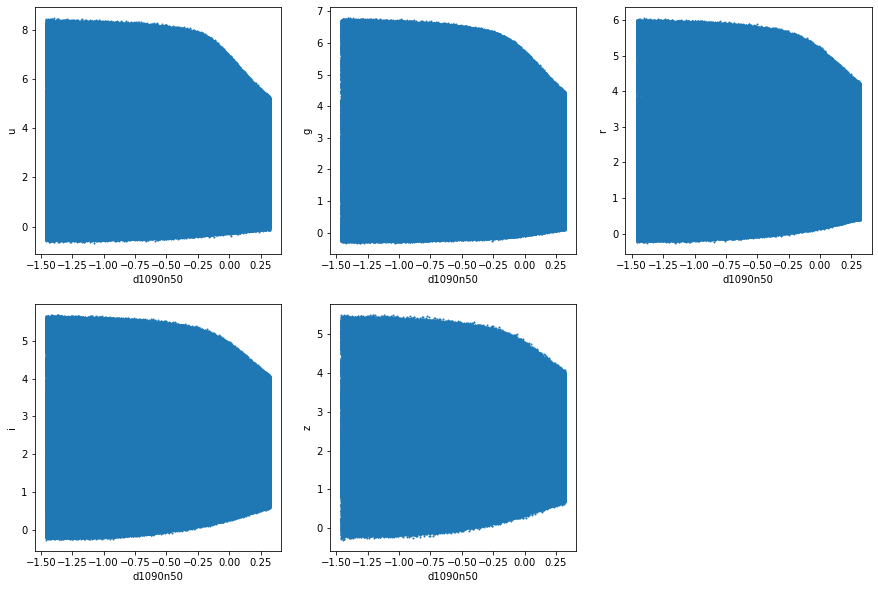

In [6]:
fig_res_tot_mag=f_plt.idx_resol(d1090n50,mag_u,mag_g, mag_r, mag_i, mag_z, par_name='d1090n50', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

(array([  1.,   0.,   0.,   1.,   3.,   7.,   9.,  10.,   6.,   5.,  20.,
         29.,  34.,  48.,  48.,  52.,  74., 116.,  96., 106., 130., 132.,
        149., 141., 133., 116., 133., 140., 135., 128., 114.,  92.,  79.,
         68.,  82.,  51.,  42.,  32.,  28.,  28.,  14.,   7.,  12.,   6.,
          4.,   5.,   4.,   0.,   1.,   4.]),
 array([3.129257 , 3.1342988, 3.1393404, 3.1443822, 3.149424 , 3.1544657,
        3.1595075, 3.1645494, 3.169591 , 3.1746328, 3.1796746, 3.1847162,
        3.189758 , 3.1948   , 3.1998417, 3.2048833, 3.2099252, 3.214967 ,
        3.2200086, 3.2250504, 3.2300923, 3.235134 , 3.2401757, 3.2452176,
        3.2502592, 3.255301 , 3.2603428, 3.2653844, 3.2704263, 3.275468 ,
        3.2805097, 3.2855515, 3.2905934, 3.295635 , 3.3006768, 3.3057187,
        3.3107603, 3.315802 , 3.320844 , 3.3258858, 3.3309274, 3.3359692,
        3.341011 , 3.3460526, 3.3510945, 3.3561363, 3.361178 , 3.3662198,
        3.3712616, 3.3763032, 3.381345 ], dtype=float32),
 <BarCon

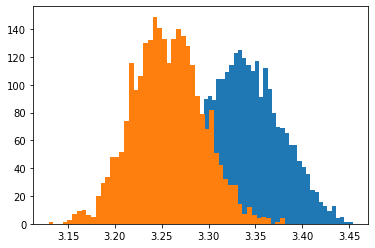

In [7]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.75)& (np.log10(age50)>8.7))

isto_pert1=np.histogram(mag_r[idx_ref], bins=50)
isto_pert2=np.histogram(mag_i[idx_ref], bins=50)
isto_pert=np.histogram(mag_i[idx_ref]-mag_r[idx_ref], bins=50)


plt.hist(mag_r[idx_ref], bins=50)
plt.hist(mag_i[idx_ref], bins=50)
#plt.plot(isto_pert[1][:-1], isto_pert[0])

3.3388891
3.2557287
-0.08316044
0.039286464
0.03722121
0.042396173


(array([  1.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   4.,   2.,  11.,
         18.,  30.,  27.,  32.,  41.,  55.,  67.,  79.,  98., 100., 126.,
        123., 128., 149., 167., 155., 164., 137., 151., 134., 103., 102.,
        106.,  84.,  65.,  51.,  28.,  38.,  30.,  24.,  12.,  10.,  10.,
          4.,   0.,   3.,   0.,   0.,   1.]),
 array([-0.2476995 , -0.24148104, -0.23526257, -0.22904411, -0.22282565,
        -0.21660718, -0.21038872, -0.20417027, -0.19795181, -0.19173335,
        -0.18551488, -0.17929642, -0.17307796, -0.1668595 , -0.16064103,
        -0.15442257, -0.1482041 , -0.14198564, -0.13576718, -0.12954873,
        -0.12333026, -0.11711179, -0.11089334, -0.10467488, -0.09845641,
        -0.09223795, -0.08601949, -0.07980102, -0.07358256, -0.0673641 ,
        -0.06114564, -0.05492718, -0.04870871, -0.04249026, -0.03627179,
        -0.03005333, -0.02383487, -0.01761641, -0.01139794, -0.00517948,
         0.00103898,  0.00725744,  0.0134759 ,  0.01969437,  0.02591283,
 

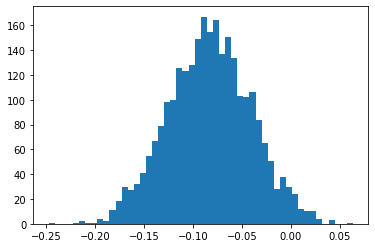

In [8]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.75)& (np.log10(age50)>8.7))
arr=mag_i[idx_ref]-mag_r[idx_ref]
isto_pert=np.histogram(arr, bins=50)

print(np.mean(mag_r[idx_ref]))
print(np.mean(mag_i[idx_ref]))
print(np.mean(mag_i[idx_ref]-mag_r[idx_ref]))

print(np.std(mag_r[idx_ref]))
print(np.std(mag_i[idx_ref]))
print(np.std(mag_i[idx_ref]-mag_r[idx_ref]))


plt.hist(mag_i[idx_ref]-mag_r[idx_ref], bins=50)

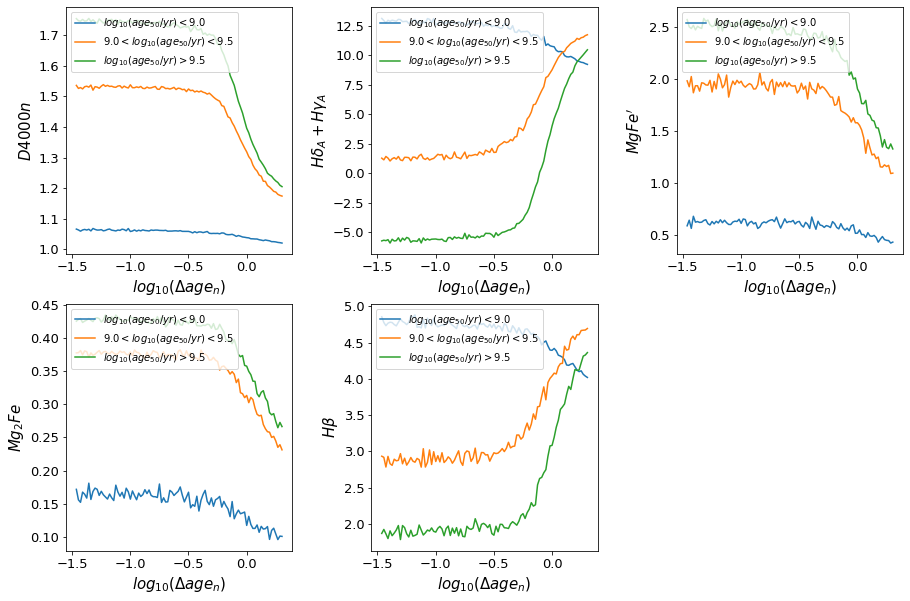

In [9]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50,idx_sel1,idx_sel2,idx_sel3,d4000n,hdhg, mgfep, mg2fe, Hb, x_name=r'$log_{10}(\Delta age_{n})$',par_name=[r'$log_{10}(age_{50}/yr)<9.0$',r'$9.0<log_{10}(age_{50}/yr)<9.5$',r'$log_{10}(age_{50}/yr)>9.5$'], idx_name=[r'$D4000n$', r'$H\delta_A+H\gamma_A$', r'$MgFe^\prime$', r'$Mg_{2}Fe$', r'$H\beta$'],bins=100, figsize=(15,10),size=15,labelsize=13,wspace=0.35)

In [10]:
#fig_resol3_idx.savefig('/export/home/extragal/erossi/ownCloud/TESI/figure/time_res3.png')

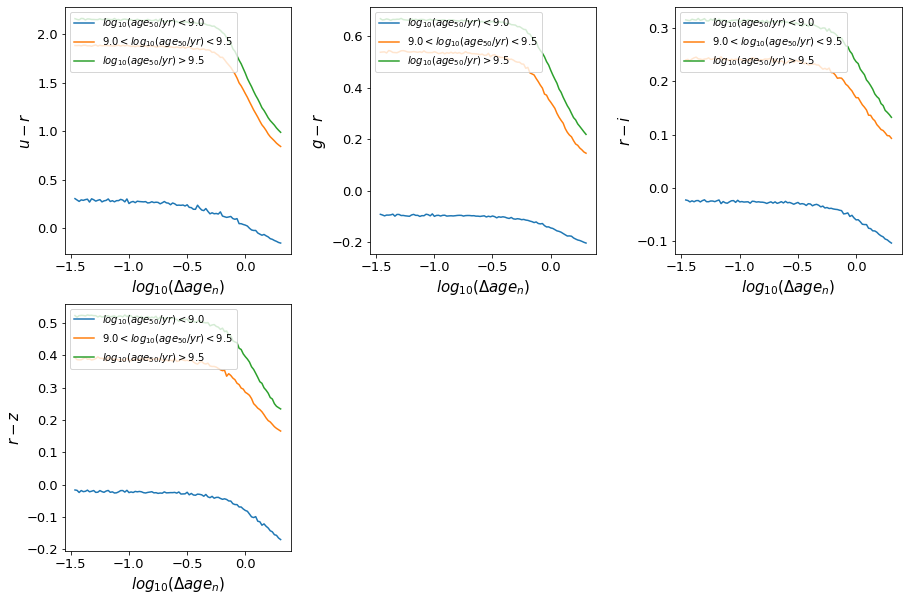

In [11]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol_col=f_plt.idx_resol_stat4col(d1090n50,idx_sel1,idx_sel2,idx_sel3,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, x_name=r'$log_{10}(\Delta age_{n})$',par_name=[r'$log_{10}(age_{50}/yr)<9.0$',r'$9.0<log_{10}(age_{50}/yr)<9.5$',r'$log_{10}(age_{50}/yr)>9.5$'], idx_name=[r'$u-r$', r'$g-r$', r'$r-i$', r'$r-z$'], figsize=(15,10), bins=100,labelsize=13,wspace=0.35)

In [12]:
#fig_resol_col.savefig('/export/home/extragal/erossi/ownCloud/TESI/figure/mag_time_res.png')

In [13]:
bins=83
bin_age50=np.histogram(np.log10(age50), bins=bins, range=(6.0, 10.15))[1]

In [14]:
np.size(bin_age50)

84

In [15]:
t_res=np.array([0.0]*bins)

In [16]:
#for i in range(0, bins):
#    idx_ref=((d1090n50<-1.0)&(np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
#    idx_sel=((np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
#    print(np.sum(idx_sel))
#    print('age50 bin:', bin_age50[i],'-', bin_age50[i+1])
#    #fig,t_res[i]=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,sigma1=sigma1,sigma2=sigma2,sigma3=sigma3,sigma4=sigma4,sigma5=sigma5,sigma6=sigma6,sigma7=sigma7,sigma8=sigma8,sigma9=sigma9,figsize=(15,5), title='nb, m62fix, obs,age50:9.45-9.5', ylim=[0.001,None], toll=0.01,sigma_obs=True )
#    fig,t_res[i]=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title=str(bin_age50[i])+'-'+str(bin_age50[i+1]), ylim=[0.001,None], toll=0.001 )
    
#    print('')

d1090n50 limit tot: nan
d1090n50 limit idx: nan
d1090n50 limit col: 0.24278564453124998
sigma_idx1: 0.03624667
sigma_idx2: 1.813796
sigma_idx3: 1.7344458
sigma_idx4: 0.7234347
sigma_idx5: 1.5241792
sigma_col1: 0.05872755
sigma_col2: 0.04158559
sigma_col3: 0.042009182
sigma_col4: 0.05831342


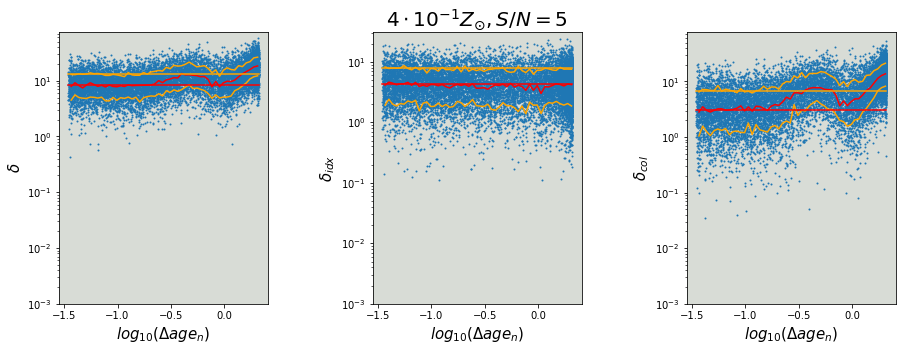

In [23]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<7.05)& (np.log10(age50)>7.0))
idx_sel=((np.log10(age50)<7.05)& (np.log10(age50)>7.0))


fig,t_res=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title=r'$4\cdot 10^{-1} Z_{\odot}, S/N='+snr+'$', ylim=[0.001,None], toll=0.001,size=15,size_title=20,wspace=0.5,labelsize=10 )


In [24]:
fig.savefig('/export/home/extragal/erossi/ownCloud/TESI/figure/tres_7705_m52snr5.png')
#fig.savefig('/export/home/extragal/erossi/ownCloud/TESI/figure/tres_97975_m62snr20.png')

In [19]:
np.sum(((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15)))

1464

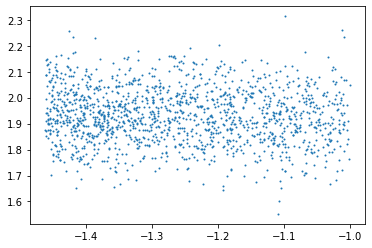

In [20]:
idx=((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15))
plt.scatter(d1090n50[idx], d4000n[idx], s=1)

ValueError: x and y must have same first dimension, but have shapes (83,) and (1,)

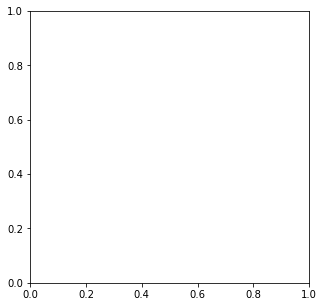

In [21]:
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    


fig, axs=plt.subplots(figsize=(5,5))
axs.plot(age50_binned, t_res, color='red')
axs.set_xlabel('age50')
axs.set_ylabel('time_resolution (d1090n50 min)')
axs.set_title('Z '+z+' fixed')
axs.minorticks_on()
axs.set_facecolor('#d8dcd6')

In [ ]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794

In [ ]:
Z=[z32,z42,z52,z62,z72]

In [ ]:
bin_z=np.histogram(Z, bins=5)[1]

In [ ]:
bin_z

In [ ]:
x,y=np.meshgrid(bin_age50, bin_z)

In [ ]:
np.shape(y)

In [ ]:
time_res_file=work_dir+'Time_resol_Zfix1M_SNR100_tot.fits'
list_t=fits.open(time_res_file)

In [ ]:
list_t.info()

In [ ]:
table_t_res=(list_t[1].data)

In [ ]:
t_32=table_t_res['Log_d1090n50_min_z32']
t_42=table_t_res['Log_d1090n50_min_z42']
t_52=table_t_res['Log_d1090n50_min_z52']
t_62=table_t_res['Log_d1090n50_min_z62']
t_72=table_t_res['Log_d1090n50_min_z72']

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
im=ax.pcolormesh(x, y, [t_32, t_42, t_52, t_62, t_72],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
fig.colorbar(im, ax=ax)
ax.set_xlabel('log(age50/yr)')
ax.set_ylabel('log(z/z_sun)')
ax.set_title('time resolution SNR100 (d1090n50) tot')
ax.set_yticklabels([])

In [ ]:
t_32

In [ ]:
fig, axs=plt.subplots(figsize=(10,10))
axs.plot(age50_binned, t_32, label='z32')
axs.plot(age50_binned, t_42, label='z42')

axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')

In [ ]:
fig, axs=plt.subplots(figsize=(10,10))

axs.plot(age50_binned, t_52, label='z52')
axs.plot(age50_binned, t_62, label='z62')
axs.plot(age50_binned, t_72, label='z72')
axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')

In [ ]:
plt.scatter(d1090n50, tau-t_form, s=10)
plt.xlabel('log(d1090n50)')
plt.ylabel('log(tau/t_form)')

In [ ]:
10**0.25

In [ ]:
10**(-1.25)